In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
N_CLASSES = 3

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset_potato_classified/oversampled_train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2100 images belonging to 3 classes.


In [23]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [24]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [27]:
from collections import Counter
import os

train_dir = 'dataset_potato_classified/oversampled_train'
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

print("Class distribution:", class_counts)
print("Total samples:", sum(class_counts.values()))

Class distribution: {'Potato___Early_blight': 700, 'Potato___Late_blight': 700, 'Potato___healthy': 700}
Total samples: 2100


In [29]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.53981465 0.46530482 0.48883423]
  [0.54755855 0.47304875 0.49657816]
  [0.57729256 0.50278276 0.5263122 ]
  ...
  [0.58518726 0.5028343  0.5302853 ]
  [0.6001087  0.51775575 0.5452067 ]
  [0.61503005 0.5326771  0.5601281 ]]

 [[0.5385712  0.46406135 0.48759076]
  [0.54631513 0.4718053  0.4953347 ]
  [0.571697   0.49718723 0.5207166 ]
  ...
  [0.6157919  0.533439   0.56088996]
  [0.6108181  0.52846515 0.55591613]
  [0.6058443  0.5234914  0.55094236]]

 [[0.53732777 0.4628179  0.48634732]
  [0.54507166 0.47056186 0.4940913 ]
  [0.56610155 0.49159172 0.5151211 ]
  ...
  [0.64365375 0.5613008  0.5887518 ]
  [0.6579534  0.57560045 0.6030514 ]
  [0.672253   0.5899001  0.61735106]]

 ...

 [[0.65574485 0.5929997  0.636137  ]
  [0.64704067 0.5842956  0.6274328 ]
  [0.6383366  0.5755915  0.61872876]
  ...
  [0.71385115 0.65110606 0.69032174]
  [0.7393609  0.67661583 0.7158315 ]
  [0.7665575  0.7038124  0.7430281 ]]

 [[0.6095732  0.54682803 0.58996534]
  [0.6077079  0.5449628  0.5881001 ]


In [31]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset_potato_classified/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [35]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset_potato_classified/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [37]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [41]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [43]:
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

In [45]:
steps_per_epoch

66

In [47]:
validation_steps

7

In [49]:
history = model.fit(
    train_generator,
    steps_per_epoch=66,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
66/66 [==============================] - 147s 2s/step - loss: 1.0677 - accuracy: 0.3786 - val_loss: 0.8351 - val_accuracy: 0.5052
Epoch 2/20
66/66 [==============================] - 91s 1s/step - loss: 0.6834 - accuracy: 0.6871 - val_loss: 0.5542 - val_accuracy: 0.7135
Epoch 3/20
66/66 [==============================] - 86s 1s/step - loss: 0.3550 - accuracy: 0.8486 - val_loss: 0.4808 - val_accuracy: 0.8125
Epoch 4/20
66/66 [==============================] - 88s 1s/step - loss: 0.2693 - accuracy: 0.8933 - val_loss: 0.3135 - val_accuracy: 0.8646
Epoch 5/20
66/66 [==============================] - 92s 1s/step - loss: 0.1906 - accuracy: 0.9286 - val_loss: 0.2266 - val_accuracy: 0.9010
Epoch 6/20
66/66 [==============================] - 82s 1s/step - loss: 0.1543 - accuracy: 0.9424 - val_loss: 0.1561 - val_accuracy: 0.9375
Epoch 7/20
66/66 [==============================] - 88s 1s/step - loss: 0.1283 - accuracy: 0.9562 - val_loss: 0.1727 - val_accuracy: 0.9427
Epoch 8/20
66/66 [=

In [ ]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 19s 1s/step - loss: 0.1165 - accuracy: 0.9582


In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

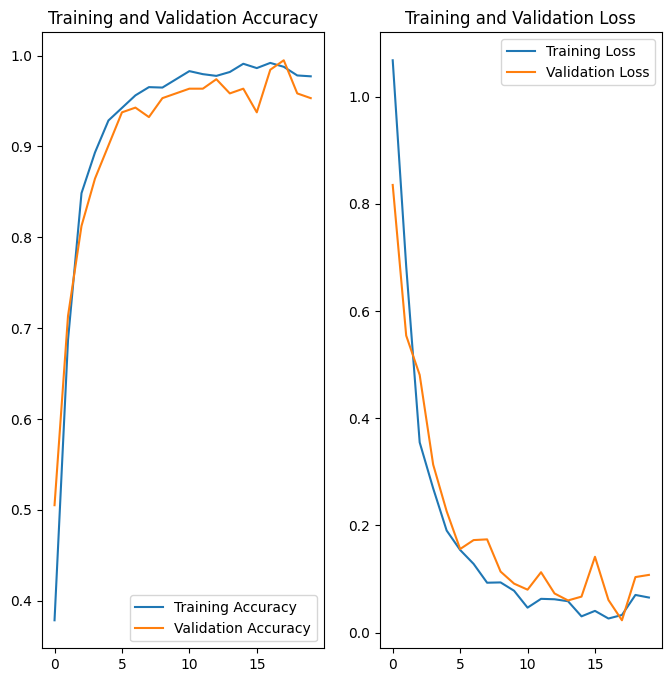

In [54]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 1s 799ms/step
predicted label: Potato___healthy


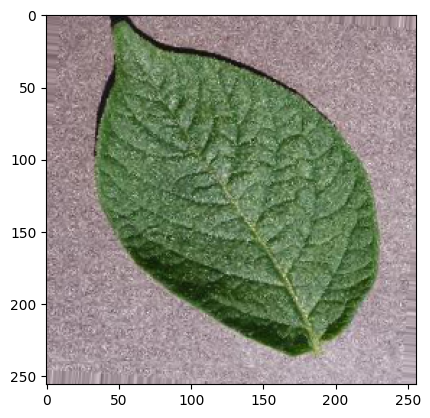

In [56]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 64ms/step


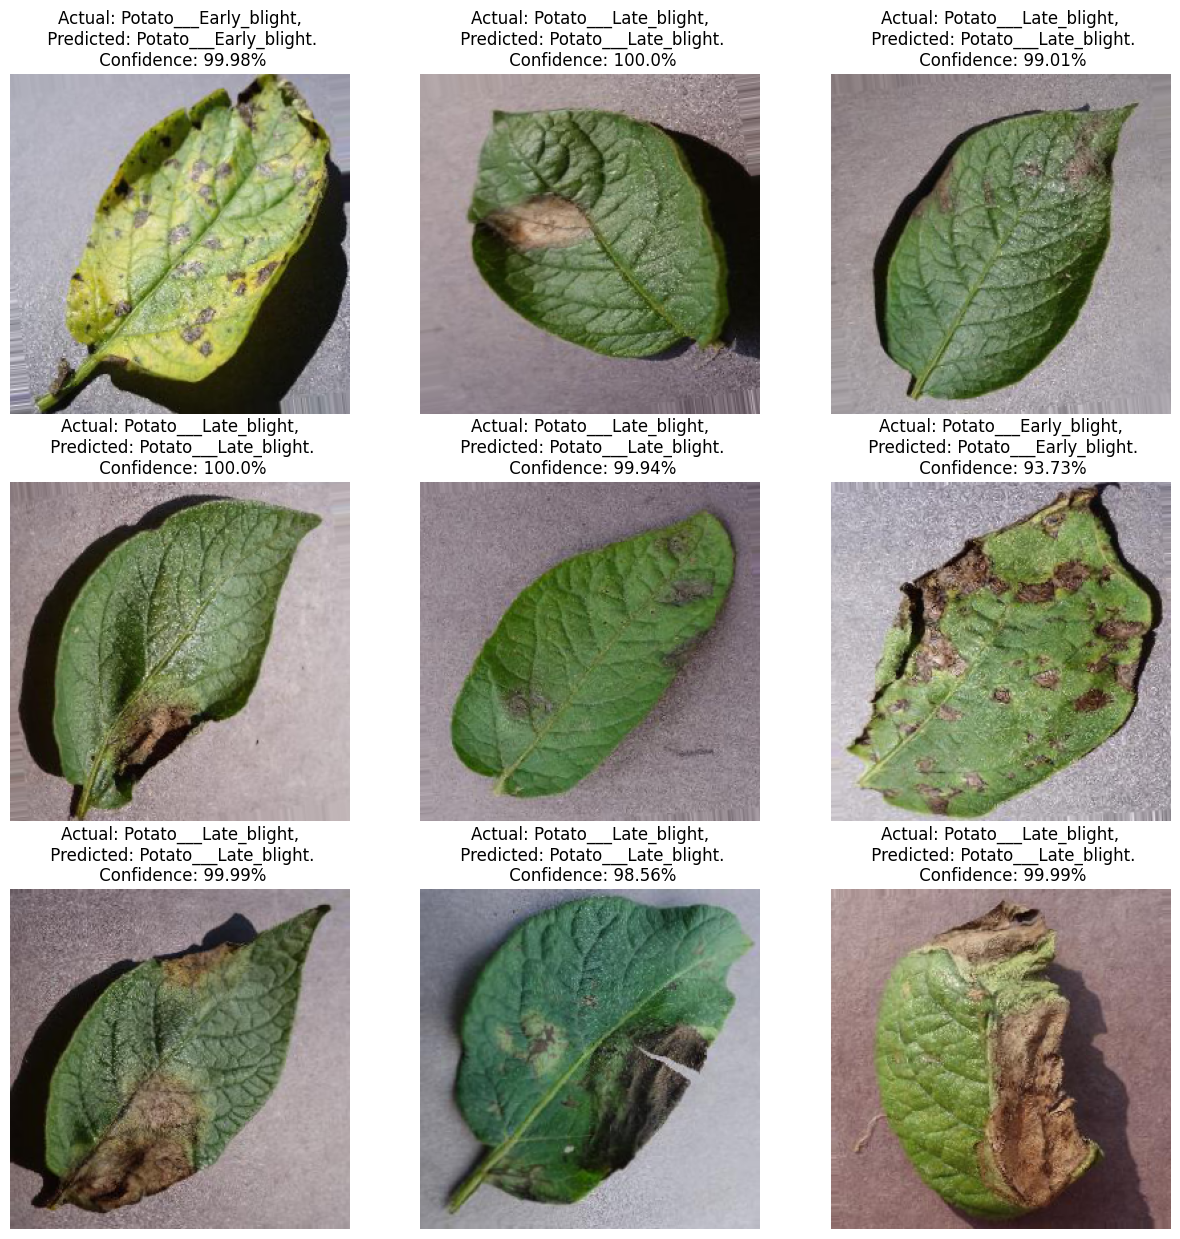

In [60]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [62]:
model.save("../potatoes_oversampled.h5")